In [ ]:
### Requirements
## numpy, sklearn, matplotlib, mne
## !pip install mne

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import ICA
from mne.datasets import sample

In [ ]:
"""
raw_fname = data_path / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = mne.io.Raw(raw_fname)
raw.info"""

"data_path = sample.data_path()\nraw_fname = data_path / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'\nraw = mne.io.Raw(raw_fname)\nraw.info"

In [ ]:
data_path = sample.data_path()
raw_fname = data_path / 'MEG' / 'sample' / 'sample_audvis_filt-0-40_raw.fif'
raw = mne.io.Raw(raw_fname)
raw.info

Opening raw data file C:\Users\Lenovo\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>

### EEG

---

##### **Plot the RAW data and view**  
Change the duration and the number of channels and browse through the data

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


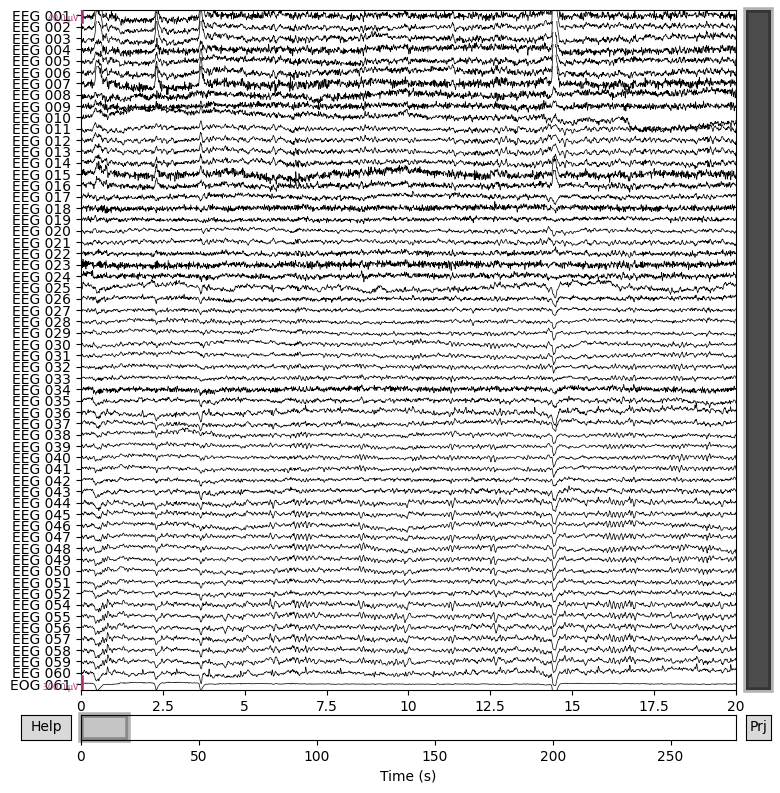

In [60]:
raw_eeg = raw.copy()
#raw_eeg.pick_types(meg=False, eeg=True, eog=True, ecg=True) # Selecting EEG, EOG and ECG channels <====== EDITME
#x = raw_eeg.plot(duration=50,n_channels=15) # Tweak duration & number of channels <====== EDITME

raw_eeg.pick_types(meg=False, eeg=True, eog=True, ecg=True) # Selecting EEG, EOG and ECG channels <====== EDITME
x = raw_eeg.plot(duration=20,n_channels=61) # Tweak duration & number of channels <====== EDITME



---


#### Run ICA  - plot components and browse

In [48]:
ica_eeg = ICA(n_components=15, random_state=97) #Setup ICA <======= EDITME
ica_eeg.fit(raw_eeg) # Run ICA

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 2.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,32 iterations on raw data (41700 samples)
ICA components,15
Available PCA components,59
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=16, n_times=41700
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


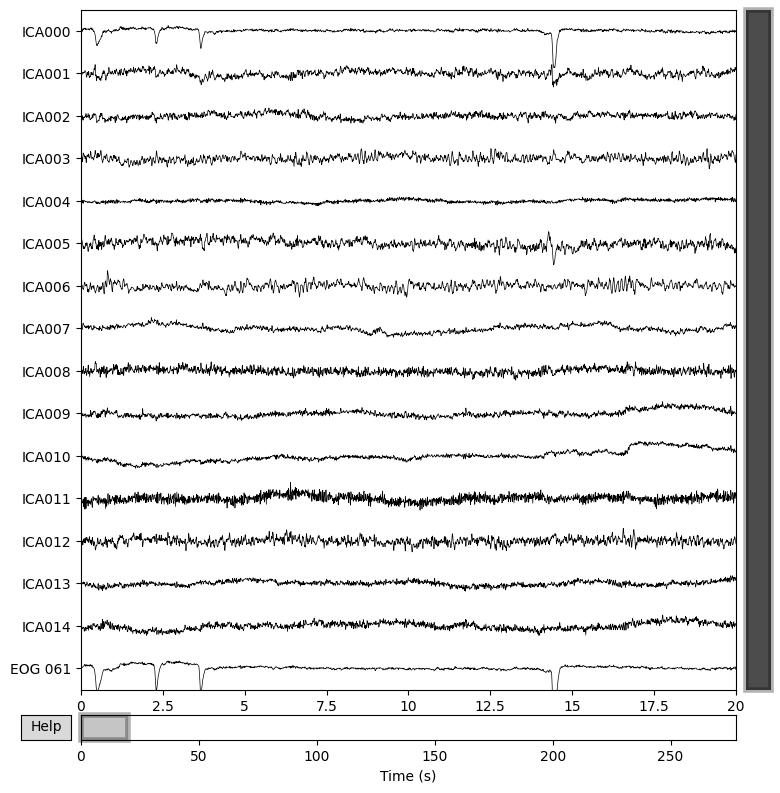

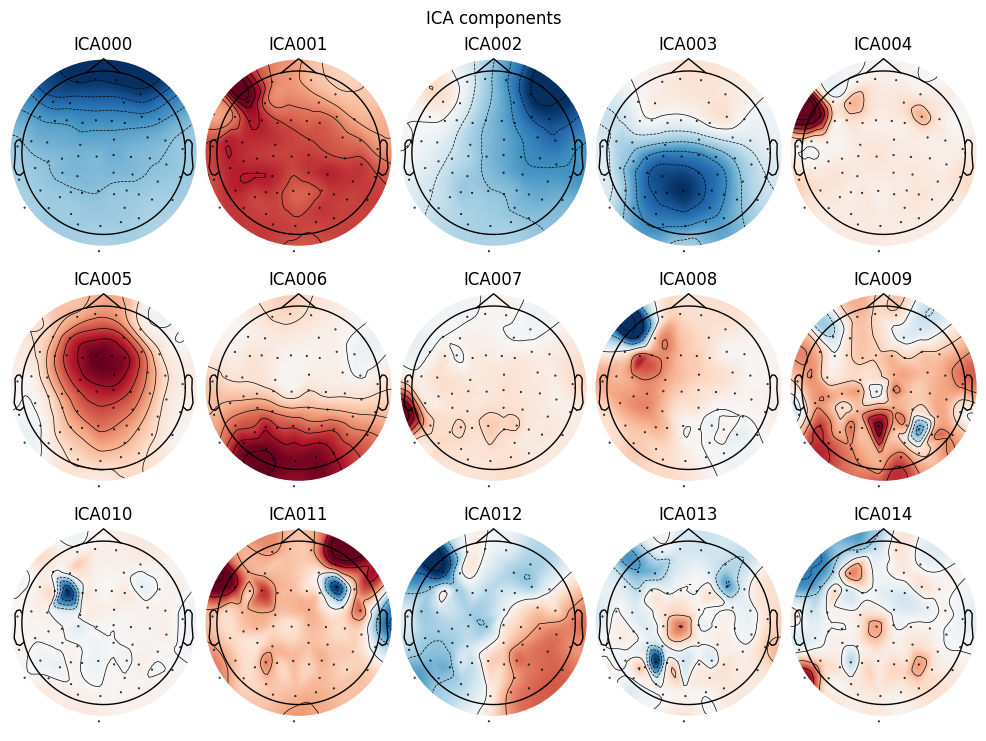

In [54]:
x = ica_eeg.plot_sources(raw_eeg) # Plot time series
x = ica_eeg.plot_components() #Plot topographies

#### Drop artefactual components 

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 59 PCA components


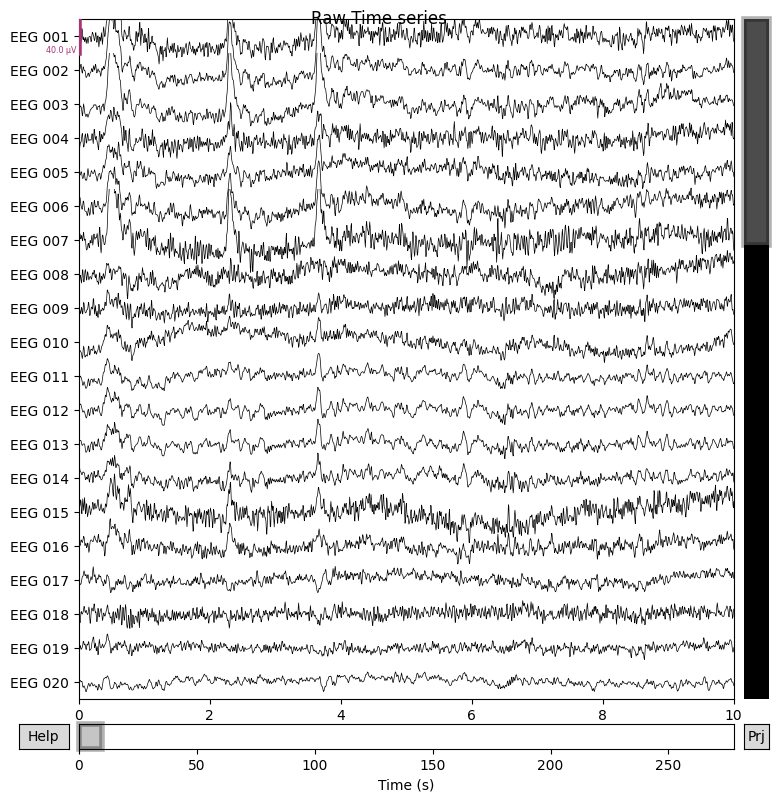

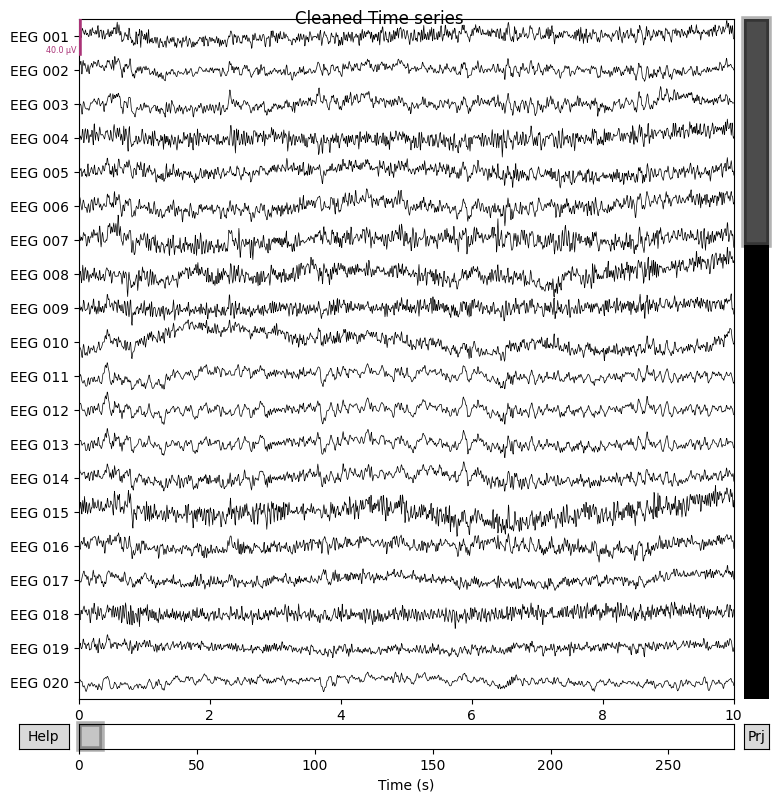

In [64]:
raw_eeg.load_data()

#ica_eeg.exclude = []  # indices chosen based on various plots above <====== EDITME
ica_eeg.exclude = [0,2]  # indices chosen based on various plots above <====== EDITME

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_eeg.copy()
ica_eeg.apply(reconst_raw)

#Raw
raw_eeg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()
del reconst_raw


### MEG
---  
#### **Plot the RAW data and view**  
Change the duration and the number of channels and browse through the data

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


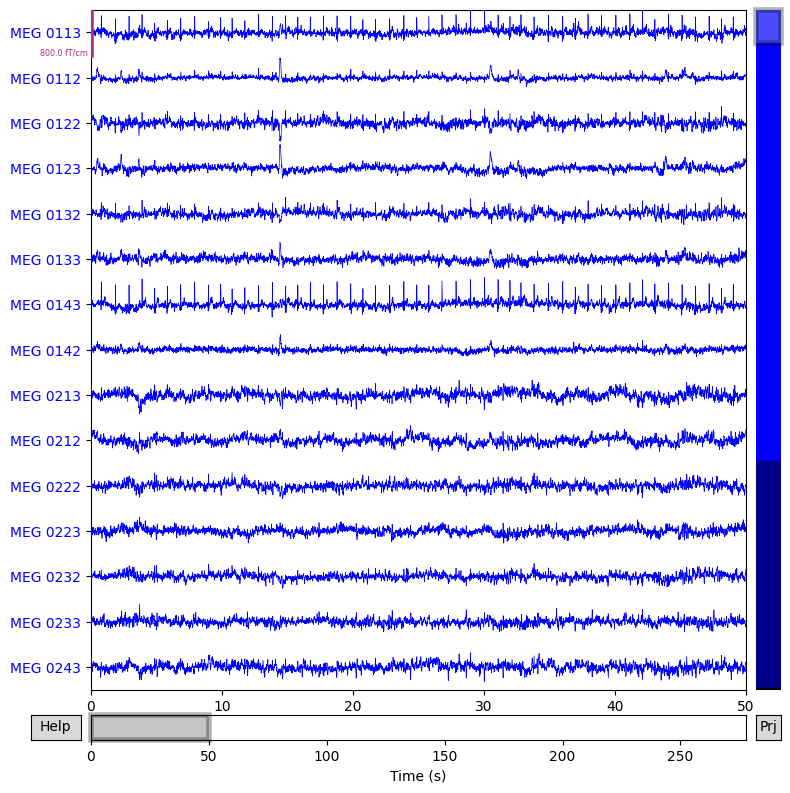

In [68]:
raw_meg = raw.copy()
raw_meg.pick_types(meg=True, eeg=False, eog=True, ecg=True) # Selecting MEG, EOG and ECG channels <====== EDITME
x = raw_meg.plot(duration=50,n_channels=15) # Tweak duration & number of channels <====== EDITME

In [70]:
ica_meg = ICA(n_components=15, random_state=97) #Setup ICA <=======
ica_meg.fit(raw_meg) # Run ICA

Fitting ICA to data using 305 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 3.5s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,37 iterations on raw data (41700 samples)
ICA components,15
Available PCA components,305
Channel types,"mag, grad"
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=16, n_times=41700
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


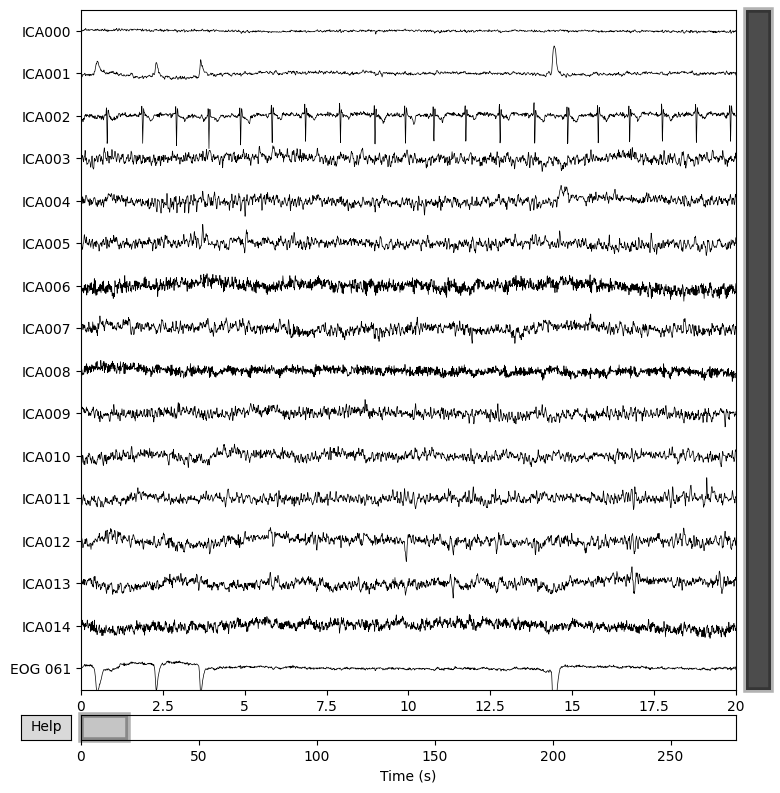

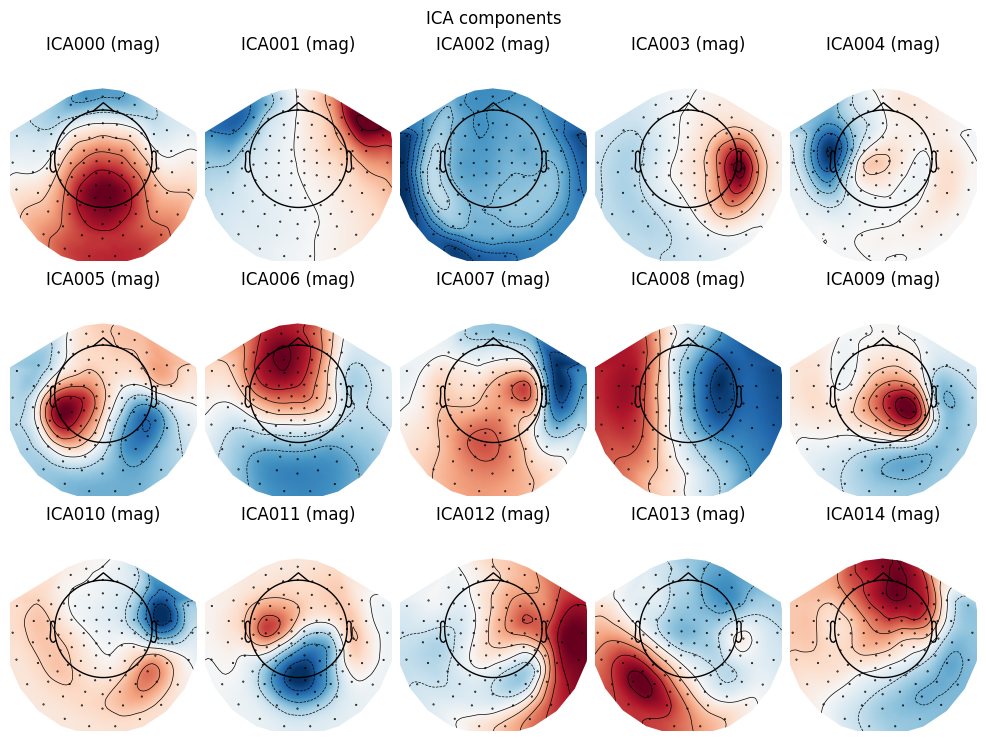

In [72]:
x = ica_meg.plot_sources(raw_meg) # Plot time series
x = ica_meg.plot_components() #Plot topographies

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 3 ICA components
    Projecting back using 305 PCA components


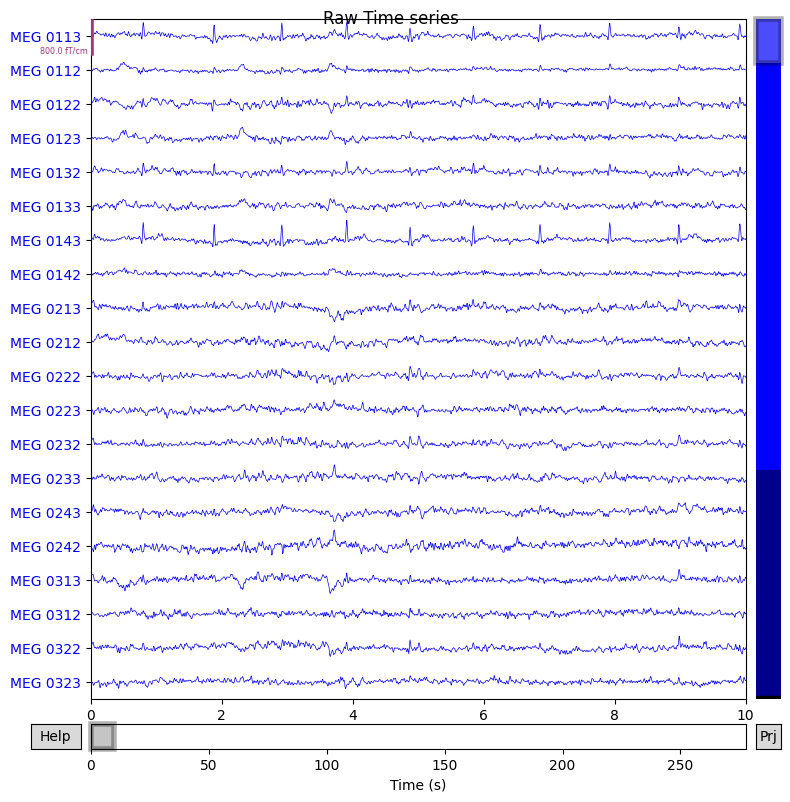

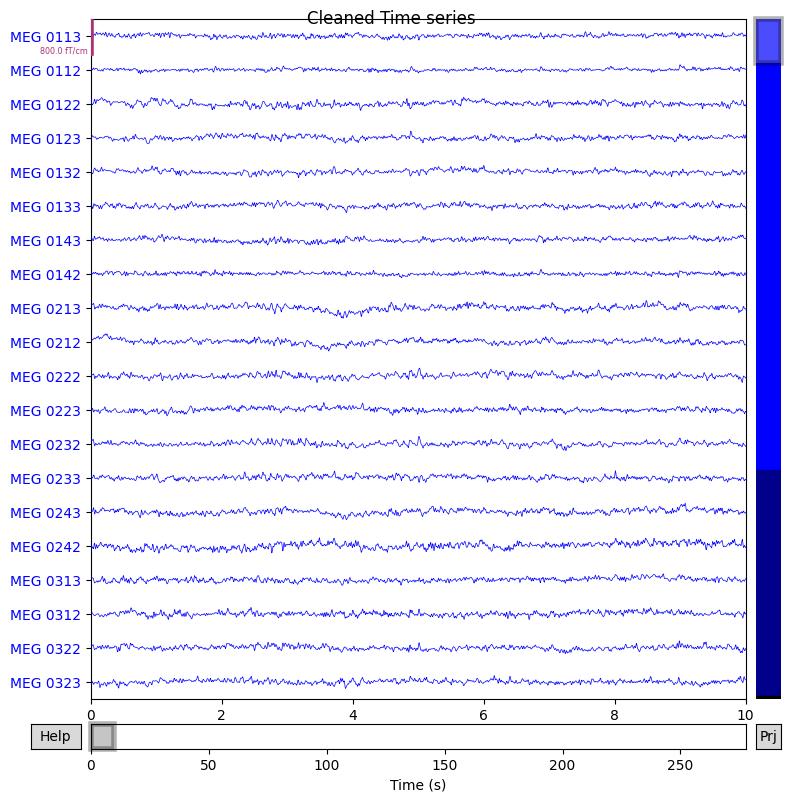

In [74]:
raw_meg.load_data()

ica_meg.exclude = [1,2,5]  # indices chosen based on various plots above <====== EDITME

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_meg.copy()
ica_meg.apply(reconst_raw)

#Raw
raw_meg.plot(show=False)
plt.suptitle('Raw Time series')


#Reconstruced after removing artefactual components
reconst_raw.plot(show=False)
plt.suptitle('Cleaned Time series')
plt.show()
del reconst_raw